<a href="https://colab.research.google.com/github/Ahmadar91/ML/blob/main/Ml_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Ahmad Abdilrahim
# Lab 2

In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn import datasets

# Task 1:
# Creating a class

### I created a class that has a train function and a plot function



In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.weights_history = []

    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.random.rand(X.shape[1])
        print(f"Initial weights: {self.weights}")
        self.weights_history = [self.weights.copy()]

        converged = False
        while not converged:
            converged = True
            i = 0
            while i < X.shape[0]:
                y_pred = 1 if np.dot(self.weights, X[i]) > 0 else 0

                if y_pred != y[i]:
                    converged = False
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.weights_history.append(self.weights.copy())
                    break
                i += 1
        print(f"Final weights: {self.weights}")


    def plot_decision_boundaries(self, X, y, label1="class 1", label2 = "class 2", feature1= "", feature2="" ):
        plt.figure(figsize=(10,8))

        for w in self.weights_history:
            x1_vals = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
            x2_vals = -(w[1] / w[2]) * x1_vals - w[0] / w[2]
            plt.plot(x1_vals, x2_vals, 'r--', alpha=0.3)

        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='cyan', marker='o', edgecolor='b', s=60, label=label1)
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='black', marker='x', edgecolor='g', s=60, label=label2)

        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title('Decision Boundaries After Each Weight Update')
        plt.legend()
        plt.grid(True)
        plt.show()


    def plot_decision_boundaries_last(self, X, y, label1="class 1", label2 = "class 2", feature1= "", feature2=""):
        plt.figure(figsize=(10, 8))

        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='cyan', marker='o', s=60, label=label1)
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='black', marker='x', s=60, label=label2)

        w = self.weights

        x1_vals = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
        x2_vals = -(w[1] / w[2]) * x1_vals - w[0] / w[2]

        plt.plot(x1_vals, x2_vals, 'r-', linewidth=2)

        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title('Last Decision Boundary')
        plt.legend()
        plt.grid(True)
        plt.show()



Initial weights: [0.65756856 0.92316003 0.36529306]
Final weights: [-0.14243144  0.12316003  0.36529306]


<ipython-input-25-ed52527d873d>:38: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='black', marker='x', edgecolor='g', s=60, label=label2)


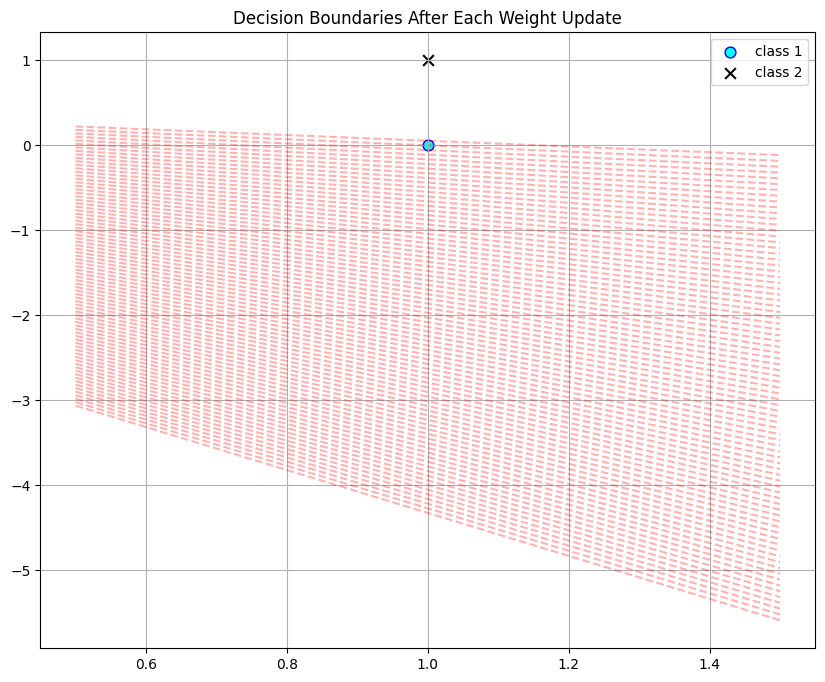

In [ ]:
random_data = {
    "x1": [1.0, 1.0],
    "x2": [0.0, 1.0],
    "y":  [0.0, 1.0]
}
df = pd.DataFrame(random_data)


X_train = df.drop(columns=['y'])
y_train = df['y']

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

model = Perceptron(learning_rate=0.01)
model.train(X_train_np, y_train_np)
model.plot_decision_boundaries(X_train_np, y_train_np)

Initial weights: [0.50948303 0.91387477 0.22034759]
Final weights: [-0.22051697  0.19387477  0.21034759]


<ipython-input-25-ed52527d873d>:38: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='black', marker='x', edgecolor='g', s=60, label=label2)


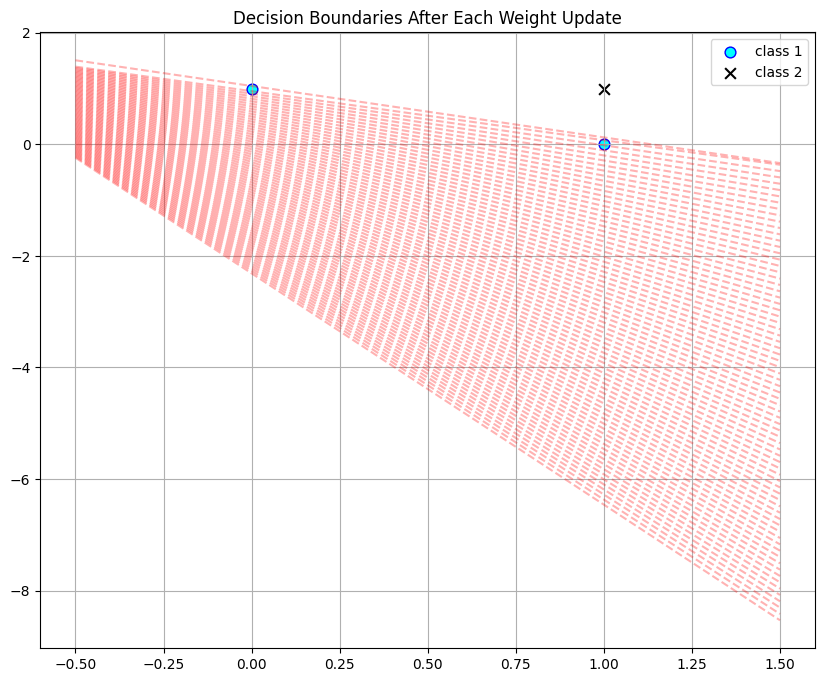

In [ ]:
random_data2 = {
    "x1": [1.0, 0.0, 1.0],
    "x2": [0.0, 1.0, 1.0],
    "y":  [0.0, 0.0, 1.0]
}
df2 = pd.DataFrame(random_data2)


X_train = df2.drop(columns=['y'])
y_train = df2['y']

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

model = Perceptron(learning_rate=0.01)
model.train(X_train_np, y_train_np)
model.plot_decision_boundaries(X_train_np, y_train_np)

# Task 2 And/OR gates


### And Gate

Initial weights: [0.49703224 0.56564757 0.87086299]
Final weights: [-0.46296776  0.02564757  0.45086299]


<ipython-input-25-ed52527d873d>:38: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='black', marker='x', edgecolor='g', s=60, label=label2)


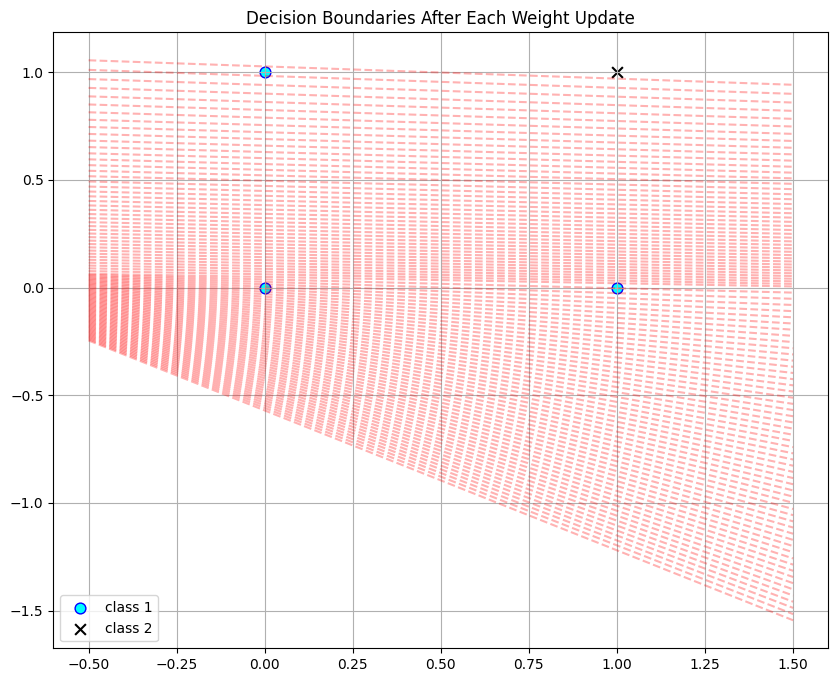

In [ ]:
data_AND_Gate = {
    "x1": [1.0, 0.0, 0.0, 1.0],
    "x2": [0.0, 1.0, 0.0, 1.0],
    "y":  [0.0, 0.0, 0.0, 1.0]
}
df_And_Gate = pd.DataFrame(data_AND_Gate)


X_train = df_And_Gate.drop(columns=['y'])
y_train = df_And_Gate['y']

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

model = Perceptron(learning_rate=0.01)
model.train(X_train_np, y_train_np)
model.plot_decision_boundaries(X_train_np, y_train_np)




### OR Gate

Initial weights: [0.54893391 0.11697911 0.83516047]
Final weights: [-0.00106609  0.11697911  0.83516047]


<ipython-input-25-ed52527d873d>:38: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='black', marker='x', edgecolor='g', s=60, label=label2)


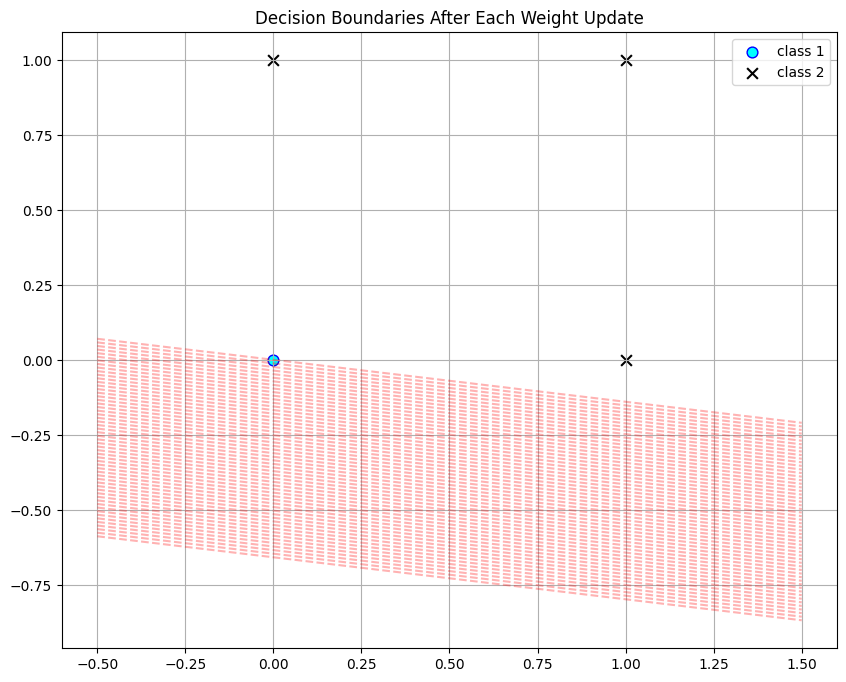

In [ ]:
data_OR_Gate = {
    "x1": [1.0, 0.0, 0.0, 1.0],
    "x2": [0.0, 1.0, 0.0, 1.0],
    "y":  [1.0, 1.0, 0.0, 1.0]
}
df_OR_Gate = pd.DataFrame(data_OR_Gate)

X_train = df_OR_Gate.drop(columns=['y'])
y_train = df_OR_Gate['y']

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

model = Perceptron(learning_rate=0.01)
model.train(X_train_np, y_train_np)
model.plot_decision_boundaries(X_train_np, y_train_np)

# Task 3:

### for this task I used sklearn datasets to import the iris data set the reason I chose to import is easier than reading a csv since it the code van be ran with out an extra file. I chose two clasess and added a bias column

I had to increase the number of epochs to 2500 since my learting rate was low = 0.01


<ipython-input-17-0e98fbd3f74d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['y'] = filtered_df['y'].map({0: 0, 1: 1})
<ipython-input-17-0e98fbd3f74d>:19: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_iris_train[y_iris_train == 1][:, 0], X_iris_train[y_iris_train == 1][:, 1], c='black', marker='x', edgecolor='g', s=60, label='versicolor')


    sepal length (cm)  sepal width (cm)  y
0                 5.1               3.5  0
1                 4.9               3.0  0
2                 4.7               3.2  0
3                 4.6               3.1  0
4                 5.0               3.6  0
..                ...               ... ..
95                5.7               3.0  1
96                5.7               2.9  1
97                6.2               2.9  1
98                5.1               2.5  1
99                5.7               2.8  1

[100 rows x 3 columns]


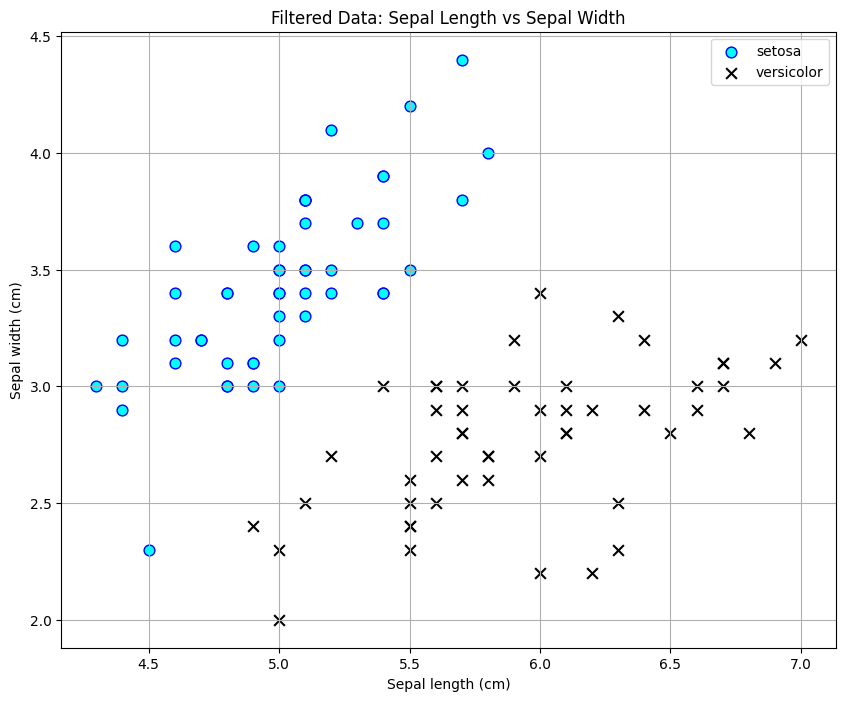

Initial weights: [0.70094954 0.94367093 0.31300504]
Final weights: [-12.29905046   7.85367093 -10.02699496]


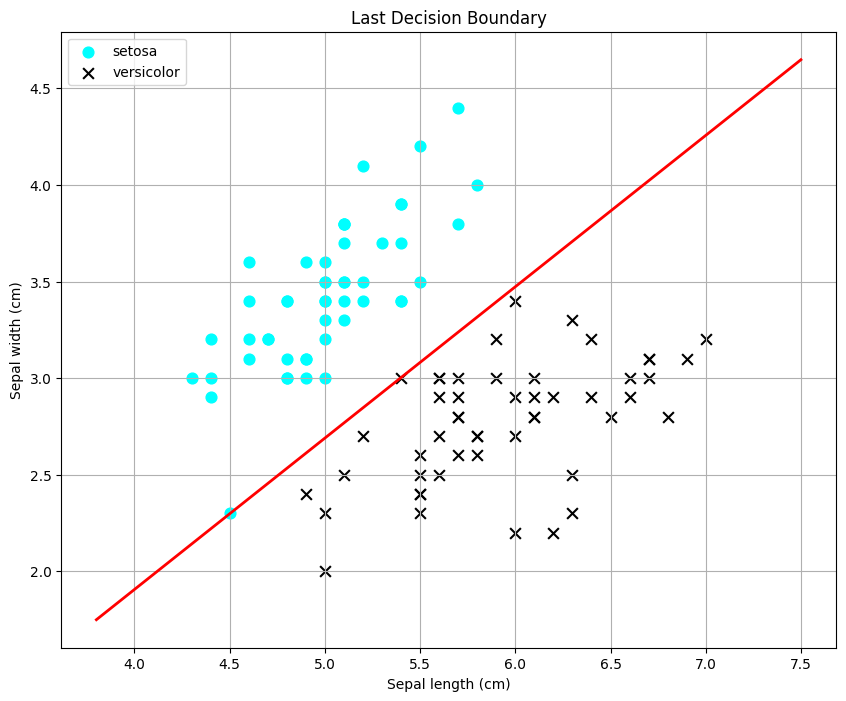

In [ ]:

from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['y'] = iris.target
filtered_df = df[df['y'] < 2]
filtered_df['y'] = filtered_df['y'].map({0: 0, 1: 1})
filtered_df = filtered_df[['sepal length (cm)', 'sepal width (cm)', 'y']]

print(filtered_df)

X_iris_train = filtered_df.drop(columns=['y']).to_numpy()
y_iris_train = filtered_df['y'].to_numpy()


plt.figure(figsize=(10, 8))
plt.scatter(X_iris_train[y_iris_train == 0][:, 0], X_iris_train[y_iris_train == 0][:, 1], c='cyan', marker='o', edgecolor='b', s=60, label='setosa')
plt.scatter(X_iris_train[y_iris_train == 1][:, 0], X_iris_train[y_iris_train == 1][:, 1], c='black', marker='x', edgecolor='g', s=60, label='versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Filtered Data: Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.show()


model_iris = Perceptron(learning_rate=0.1)
model_iris.train(X_iris_train, y_iris_train)
model_iris.plot_decision_boundaries_last(X_iris_train, y_iris_train, "setosa", "versicolor", 'Sepal length (cm)', 'Sepal width (cm)')




# Results
as seen for the last task since we had more data and more features I had to increase the number of epochs, I imporved it by removing the redundent while loop and made it converge on both for loops

# Task 4: Report
## Task 1: Understanding the Perceptron Learning Algorithm with a Minimal Dataset
### Steps Followed:

* Initialization: Began with a simple dataset consisting of just one row. This minimalistic approach was adopted to understand the basic mechanics of the perceptron algorithm.
* Implementation: Using the pseudo-code provided during the lab session, the perceptron algorithm was implemented. This step ensured that the logic was correctly understood and applied.

## Task 2: Expanding the Dataset and Plotting Decision Boundaries
###Steps Followed:

* Dataset Expansion: Progressed from the single-row dataset to a more comprehensive dataset. This dataset included three rows with an additional bias term.
* Decision Boundary Visualization: Integrated visualization capabilities to plot the decision boundary. This visualization helped in understanding how the perceptron adjusted its weights to segregate the data.

##Task 3: Object-Oriented Approach and Iris Dataset Application
###Steps Followed:

* Class Implementation: Transformed the procedural implementation of the perceptron into a class-based approach. This encapsulation allowed for better management of data and methods.
Iteration Modification: Replaced the initial 'for' loop approach with a 'while' loop to adhere more closely to the traditional perceptron learning algorithm.
* Testing on Logical Gates: Utilized the AND and OR gates as datasets to validate the class implementation. This step involved training the perceptron and subsequently plotting the decision boundaries.
* Application on Real-world Dataset: The class was then applied to the Iris dataset (filtered for two classes). A different plotting function was used to highlight the final decision boundary.

## Discussion:
The perceptron learning algorithm, as implemented, provided a clear understanding of linear classification. By beginning with a simple dataset and incrementally increasing complexity, the fundamental operations of weight adjustments were explored. Visualizing decision boundaries was crucial in understanding how the perceptron attempted to segregate data points based on their classes.

## Suggestions for Improvement:
* Loop Structure: Consider using a 'for' loop with a maximum iteration count as opposed to the 'while' loop. This would prevent potential infinite loops.

* Incorporation of Epochs: Introducing epochs can serve as a mechanism to ensure the perceptron has ample iterations to learn and converge. It would also act as a safety mechanism to prevent endless training sessions.

By adopting the aforementioned improvements, the perceptron's efficiency and safety can be enhanced, making it more robust for diverse datasets.